In [1]:
import os
import pandas as pd 
from PIL import Image
from io import BytesIO
import base64
from os.path import exists
from tqdm.notebook import tqdm, trange
from IPython.display import Image as IImage
tqdm.pandas()

In [2]:
import pillow_avif

In [3]:
root_path = '/raid/AISSEL/Hamed/datasets/ped_google'

In [6]:
f_names =[el for el in os.listdir(root_path) if not el.endswith('jpg') and not el.endswith('txt')]
other = []
for fn in f_names:
    if '.' in fn:
        _, pre = fn.rsplit('.', 1)
        other.append(pre)
other = list(set(other))       
print(other)

['jpeg', 'png', 'avif', 'JPG', 'webp']


In [23]:
f_names =[el for el in os.listdir(root_path) if el.endswith('jpg')]
len(f_names)

141

In [9]:
print(f_names)

['112-1.jpg', '112-2.jpg', '112-3.webp', '112-4.jpg', '112-5.jpg', '112-6.jpg', '114-1.jpg', '114-2.jpg', '-1-1.webp', '12-1.webp', '12-2.jpg', '12-3.jpg', '12-4.jpg', '12-5.jpg', '-1-2.jpg', '134-1.jpg', '137-1.jpg', '137-2.jpg', '137-3.jpg', '137-4.jpg', '137-5.jpg', '137-6.jpg', '137-7.webp', '137-8.jpg', '137-9.webp', '-1-3.png', '144-1.jpg', '144-2.jpg', '144-3.jpg', '144-4.jpg', '144-5.jpg', '144-6.jpg', '150-1.webp', '150-2.jpg', '150-3.jpg', '150-4.webp', '169-1.jpg', '169-2.webp', '169-3.webp', '169-4.jpg', '169-5.jpg', '172-1.jpg', '172_1.webp', '172_2.png', '172-3.jpg', '172_3.webp', '172_8.webp', '172_9.webp', '173-4.jpg', '173-5.jpg', '192-1.jpg', '192-2.jpg', '196_10.jpg', '196_3.jpg', '196_4.jpg', '196_5.jpg', '196_6.jpg', '196_7.jpg', '196_8.jpg', '196_9.jpg', '198-1.jpg', '198-2.jpg', '20-1.jpg', '20-2.jpg', '224-1.jpg', '224-2.jpg', '224-3.jpg', '224-4.jpg', '265-1.webp', '265-2.webp', '278-1.webp', '278-2.jpg', '294-2.jpg', '296-1.jpg', '309-1.jpg', '363-1.png', '378

In [ ]:
for el in other:
    print([el for el in os.listdir(root_path) if el.endswith('avif')])

In [8]:
for pre in other:
    f_names =[el for el in os.listdir(root_path) if el.endswith(pre)]
    for fn in f_names:
        im = Image.open(f'{root_path}/{fn}').convert("RGB")
        name, _ =  fn.rsplit('.', 1)
        im.save(f'{root_path}/{name}.jpg', "jpeg")
        os.remove(f'{root_path}/{fn}')

In [9]:
f_names =[el for el in os.listdir(root_path) if not el.endswith('jpg') and not el.endswith('txt')]
f_names

['202',
 '216',
 '250',
 '314',
 '327',
 '331',
 '344',
 '345',
 '376',
 '388',
 '416',
 '426']

In [10]:
f_names =[el for el in os.listdir(root_path) if el.startswith('196_') ]
len(f_names)

0

In [157]:
for fn in f_names:
    f_path = f'{root_path}/{fn}'
    x, name =  fn.split('_', 1)
#     print(f'{x}-{name}')
    os.rename(f_path, f'{root_path}/{x}-{name}')


In [158]:
f_names

[]

In [11]:
count_dict = dict()
splt_char = "-"
k = 2 
f_names =[el for el in os.listdir(root_path) if el.endswith('jpg')]
for fn in f_names:
    t, _ = fn.split('-', 1)

    if t == '':
        temp = fn.split(splt_char)
        t = splt_char.join(temp[:k]), splt_char.join(temp[k:])
        t = t[0]
    if not t in count_dict:
        count_dict[t] = 1
    else:
        count_dict[t] = count_dict[t] + 1

In [12]:
count_dict

{'309': 6,
 '112': 10,
 '-1': 10,
 '114': 10,
 '12': 10,
 '137': 10,
 '134': 10,
 '150': 10,
 '172': 10,
 '169': 10,
 '196': 10,
 '363': 1,
 '265': 10,
 '192': 2,
 '412': 10,
 '198': 10,
 '20': 10,
 '224': 8,
 '278': 10,
 '378': 6,
 '40': 10,
 '294': 10,
 '296': 10,
 '53': 10,
 '394': 1,
 '11': 10,
 '43': 10,
 '419': 4,
 '432': 1,
 '441': 3,
 '47': 10,
 '56': 10,
 '68': 10,
 '80': 10,
 '8': 9,
 '98': 10,
 '99': 10}

In [13]:
def b64(im_path):
    fn = im_path
    img = Image.open(fn)
    img_buffer = BytesIO()
    img.save(img_buffer, format=img.format)
    byte_data = img_buffer.getvalue()
    base64_str = str(base64.b64encode(byte_data))[2:-1]
#     base64_str = None
#     if exists(fn):
#         try:
#             img = Image.open(fn)
#             img_buffer = BytesIO()
#             img.save(img_buffer, format=img.format)
#             byte_data = img_buffer.getvalue()
#             base64_str = str(base64.b64encode(byte_data))[2:-1]
#         except:
#             base64_str = None
#             pass
    return base64_str

In [16]:
lsit_of_file_dict = list()
for t in count_dict:
#     file_dict = dict()
    f_names =[el for el in os.listdir(root_path) if el.startswith(f'{t}-')]
    im_num = [el.rsplit('-', 1)[1].split('.', 1)[0] for el in f_names if el.endswith('.jpg')]
#     print(f_names)
    for im in im_num:
        file_dict = dict()
        file_dict['topic'] = t
        file_dict['caption'] = ""
        file_dict['context'] = ""
        file_dict['tag'] = ""
        print(f'{root_path}/{t}-{im}')
        with open(f'{root_path}/{t}-{im}_cap.txt') as f:
            lines = [line.rstrip('\n') for line in f.readlines()]
            file_dict['caption'] = " ".join(lines)
        with open(f'{root_path}/{t}-{im}_con.txt') as f:
            lines = [line.rstrip('\n') for line in f.readlines()]
            file_dict['context'] = " ".join(lines)
        with open(f'{root_path}/{t}-{im}_tag.txt') as f:
            file_dict['tag'] = [line.rstrip('\n').strip() for line in f.readlines()]
            file_dict['tag'] = [el for el in file_dict['tag'] if el !='']
            for el in file_dict['tag']:
                if ':' not in el:
                    print(f'{root_path}/{t}-{im}_tag.txt')
            file_dict['query_gt'] = [] 
            sum_ = 0
            for el in file_dict['tag']:
                k, v = el.split(':', 1)
#                 print(el)
#                 print(k, v)
                file_dict['query_gt'].append(k.strip())
                sum_ = sum_ + int(v.strip())
            file_dict['gt_coverage'] =  float(sum_ / len(file_dict['query_gt']))
#         file_dict['caption'] = f'{root_path}/{t}-{im}_cap.txt'
#         file_dict['con_path'] = f'{root_path}/{t}-{im}_con.txt'
#         file_dict['tag_path'] = f'{root_path}/{t}-{im}_tag.txt'
        file_dict['image'] = b64(f'{root_path}/{t}-{im}.jpg')
#         file_dict['image'] = ""
        lsit_of_file_dict.append(file_dict)
#     print(lsit_of_file_dict)
#     print(f_names)
#     break

/raid/AISSEL/Hamed/datasets/ped_google/309-2
/raid/AISSEL/Hamed/datasets/ped_google/309-1
/raid/AISSEL/Hamed/datasets/ped_google/309-3
/raid/AISSEL/Hamed/datasets/ped_google/309-4
/raid/AISSEL/Hamed/datasets/ped_google/309-5
/raid/AISSEL/Hamed/datasets/ped_google/309-6
/raid/AISSEL/Hamed/datasets/ped_google/112-1
/raid/AISSEL/Hamed/datasets/ped_google/112-2
/raid/AISSEL/Hamed/datasets/ped_google/112-4
/raid/AISSEL/Hamed/datasets/ped_google/112-5
/raid/AISSEL/Hamed/datasets/ped_google/112-6
/raid/AISSEL/Hamed/datasets/ped_google/112-10
/raid/AISSEL/Hamed/datasets/ped_google/112-7
/raid/AISSEL/Hamed/datasets/ped_google/112-8
/raid/AISSEL/Hamed/datasets/ped_google/112-3
/raid/AISSEL/Hamed/datasets/ped_google/112-9
/raid/AISSEL/Hamed/datasets/ped_google/-1-1
/raid/AISSEL/Hamed/datasets/ped_google/-1-2
/raid/AISSEL/Hamed/datasets/ped_google/-1-10
/raid/AISSEL/Hamed/datasets/ped_google/-1-3
/raid/AISSEL/Hamed/datasets/ped_google/-1-4
/raid/AISSEL/Hamed/datasets/ped_google/-1-9
/raid/AISSEL/H

/raid/AISSEL/Hamed/datasets/ped_google/294-1
/raid/AISSEL/Hamed/datasets/ped_google/294-10
/raid/AISSEL/Hamed/datasets/ped_google/294-4
/raid/AISSEL/Hamed/datasets/ped_google/294-3
/raid/AISSEL/Hamed/datasets/ped_google/294-5
/raid/AISSEL/Hamed/datasets/ped_google/294-6
/raid/AISSEL/Hamed/datasets/ped_google/294-7
/raid/AISSEL/Hamed/datasets/ped_google/294-8
/raid/AISSEL/Hamed/datasets/ped_google/294-9
/raid/AISSEL/Hamed/datasets/ped_google/296-1
/raid/AISSEL/Hamed/datasets/ped_google/296-3
/raid/AISSEL/Hamed/datasets/ped_google/296-10
/raid/AISSEL/Hamed/datasets/ped_google/296-2
/raid/AISSEL/Hamed/datasets/ped_google/296-4
/raid/AISSEL/Hamed/datasets/ped_google/296-5
/raid/AISSEL/Hamed/datasets/ped_google/296-6
/raid/AISSEL/Hamed/datasets/ped_google/296-7
/raid/AISSEL/Hamed/datasets/ped_google/296-8
/raid/AISSEL/Hamed/datasets/ped_google/296-9
/raid/AISSEL/Hamed/datasets/ped_google/53-1
/raid/AISSEL/Hamed/datasets/ped_google/53-3
/raid/AISSEL/Hamed/datasets/ped_google/53-4
/raid/AISSE

In [17]:
for el in lsit_of_file_dict:
    print(el['topic'])
    print(el['tag'])
    print(el['query_gt'])
    print(el['gt_coverage'])

309
['pedestrian:1', 'close:0', 'rail:0', 'train:0', 'railway:1', 'line:0']
['pedestrian', 'close', 'rail', 'train', 'railway', 'line']
0.3333333333333333
309
['pedestrian:1', 'close:0', 'rail:1', 'train:1', 'railway:1', 'line:1']
['pedestrian', 'close', 'rail', 'train', 'railway', 'line']
0.8333333333333334
309
['pedestrian:0', 'close:0', 'rail:1', 'train:1', 'railway:1', 'line:0']
['pedestrian', 'close', 'rail', 'train', 'railway', 'line']
0.5
309
['pedestrian:1', 'close:0', 'rail:0', 'train:0', 'railway:1', 'line:0']
['pedestrian', 'close', 'rail', 'train', 'railway', 'line']
0.3333333333333333
309
['pedestrian:1', 'close:1', 'rail:1', 'train:1', 'railway:1', 'line:0']
['pedestrian', 'close', 'rail', 'train', 'railway', 'line']
0.8333333333333334
309
['pedestrian:0', 'close:1', 'rail:1', 'train:1', 'railway:1', 'line:0']
['pedestrian', 'close', 'rail', 'train', 'railway', 'line']
0.6666666666666666
112
['pedestrian :1', 'passenger :0', 'route :1', 'bus :1', 'transport  :1', 'traffic

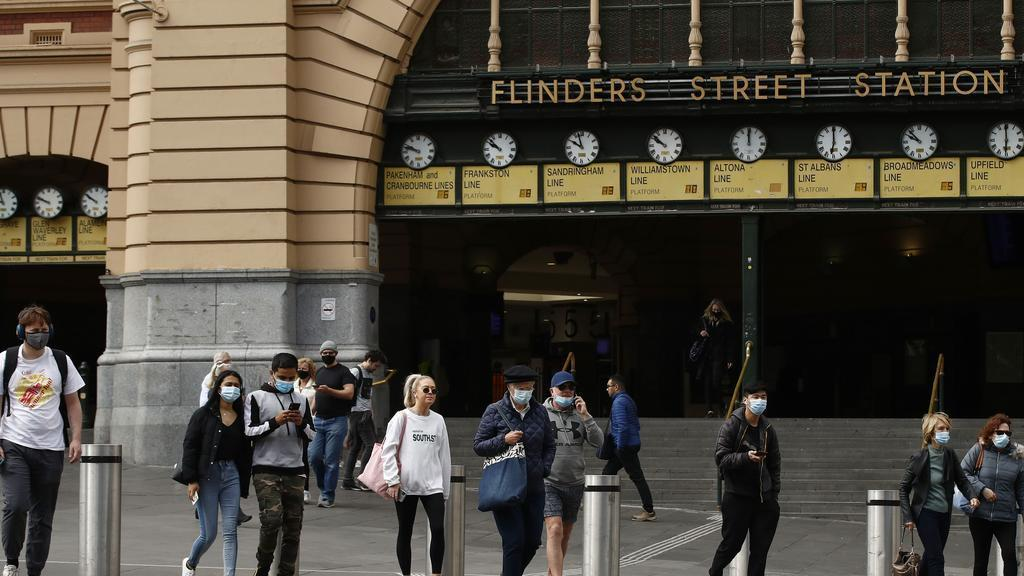

In [18]:
image_64_decode = base64.b64decode(lsit_of_file_dict[0]['image']) 
image_result = open('test.jpg', 'wb') # create a writable image and write the decoding result
image_result.write(image_64_decode)
IImage(filename='test.jpg') 

In [19]:
df = pd.DataFrame(lsit_of_file_dict)
df

,topic,caption,context,tag,query_gt,gt_coverage,image
0,309,Police are calling for public assistance after...,Police areseeking public help after a man alle...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,309,Passengers are waiting to bord train.,The Victorian Minister for Transport Infrastru...,"[pedestrian:1, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,309,"Box Hill’s $754,000 footbridge across the tracks",This is the story of the $56.5 million grade s...,"[pedestrian:0, close:0, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.500000,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,309,Metro Trains have so far been unable to say wh...,Metro Trains have so far been unable to say wh...,"[pedestrian:1, close:0, rail:0, train:0, railw...","[pedestrian, close, rail, train, railway, line]",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,309,"The Electric Tilt Train, the fastest train in ...",High-speed rail in Australia has been under in...,"[pedestrian:1, close:1, rail:1, train:1, railw...","[pedestrian, close, rail, train, railway, line]",0.833333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...,...,...,...
306,99,ARCE Students Place Second in EERI Seismic Des...,A team of Cal Poly architectural engineering (...,"[pedestrian:0, structure:1, concrete:0, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.333333,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
307,99,Timber Strong Provides Real-World Engineering ...,"For the last three years, Simpson Strong-Tie h...","[pedestrian:1, structure:0, concrete:1, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.222222,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
308,99,"Students Compete to Design, Build Timber Struc...",Hammer strikes echoed through the sunny plaza ...,"[pedestrian:1, structure:1, concrete:1, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.666667,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
309,99,Cal Poly Architectural Engineering Students Wi...,SAN LUIS OBISPO – Six Cal Poly architectural e...,"[pedestrian:1, structure:1, concrete:1, masonr...","[pedestrian, structure, concrete, masonry, ins...",0.888889,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


In [20]:
d_path = '/raid/AISSEL/Hamed/datasets'
df.to_pickle(f'{d_path}/google_images.pk')